# Impor Library

Melakukan import library yang akan digunakan pada proses data cleansing , exploratory data analysis, dan machine learning.

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Data Loading

### Kaggle API Data Download

Data yang digunakan untuk submission ini adalah data yang berasal dari [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) yang berisi data tentang kepuasan pelanggan suatu maskapai penerbangan. Data akan didownload langsung dari kaggle API dengan menggunakan token yang berada pada file kaggle.json

In [33]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction

airline-passenger-satisfaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
!unzip /content/airline-passenger-satisfaction.zip -d /content/

Archive:  /content/airline-passenger-satisfaction.zip
replace /content/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/test.csv       
replace /content/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/train.csv      


In [35]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = df=pd.concat([df_train,df_test])
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


kode dibawah in memeriksa informasi umum dari dataset. yaitu nama kolom , jumlah kolom yang tidak null, dan tipe data dari setiap kolom pada dataset.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

##Data Cleansing

menghapus kolom yang tidak digunakan dari dataframe yaitu kolom Unnamed : 0 dan kolom ID

In [37]:
df.drop(columns=df.columns[[0,1]], axis=1,  inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


dilakukan pengubahan pada variabel target menjadi data numerik

In [38]:
for var in ['satisfaction']:
    df[var] = df[var].map(lambda e: 1 if e == 'satisfied' else 0)

memeriksa struktur dan kualitas dataset. Pertama akan dilakukan pemeriksaan data yang NaN atau null pada dataset

In [39]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

ternyata terdapat data yang null dan akan dilakukan pengisian data dengan menggunakan rerata atau mean pada kolom tersebut

In [40]:
df["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].fillna(np.mean(df["Arrival Delay in Minutes"]))

selanjutnya diperiksa apakah terdapat data duplikat

In [41]:
df.duplicated().sum()

0

tidak ditemukan data duplikat. jadi sekarang dataframe sudah bersih dan dapat dilanjutkan ke tahap data preparation selanjutnya.

# Exploratory Data Analysis

dilakukan pengecekan variabel target pada dataset yaitu pada koloom satisfaction

In [42]:
df['satisfaction'].value_counts()

0    73452
1    56428
Name: satisfaction, dtype: int64

dari hasil yang ditampilkan , terdapat 2 variabel target. jumlah dari kedua variabel target tersebut sudah lumayan seimbang

selanjutnya kita akan melihat nilai statistik pada dataset

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


dapat dilihat terdapat beberapa kolom yang berkorelasi sangat kuat antar kolom

Selanjutnya melihat nilai unik pada kolom kategorikal pada dataset

In [44]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)
        print(df[i].unique(),"\n")

Gender
['Male' 'Female'] 

Customer Type
['Loyal Customer' 'disloyal Customer'] 

Type of Travel
['Personal Travel' 'Business travel'] 

Class
['Eco Plus' 'Business' 'Eco'] 



# Univariate Analysis

akan dilihat histogram dari kolom numerikal pada dataset

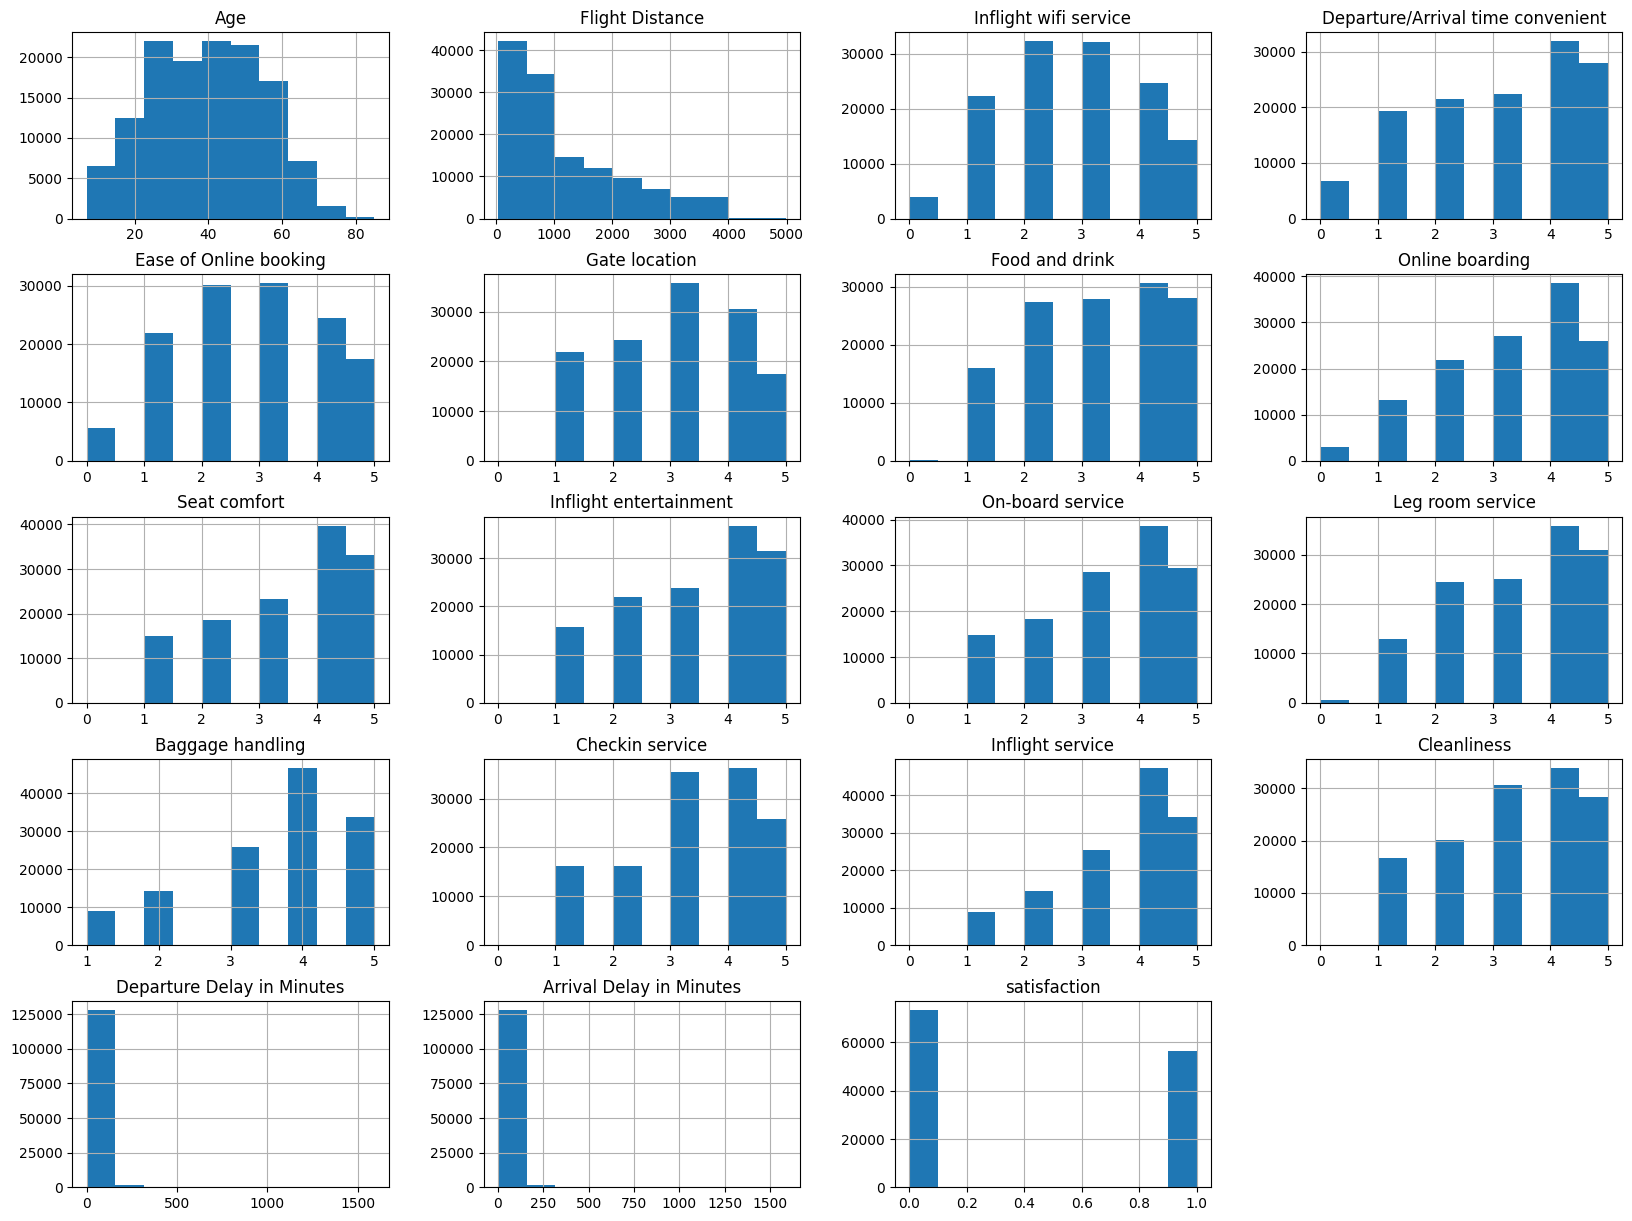

In [45]:
df.hist(figsize=(20,15))
plt.show()

selanjutnya akan dilihat diagram boxplot dari data untuk melihat outlier pada data

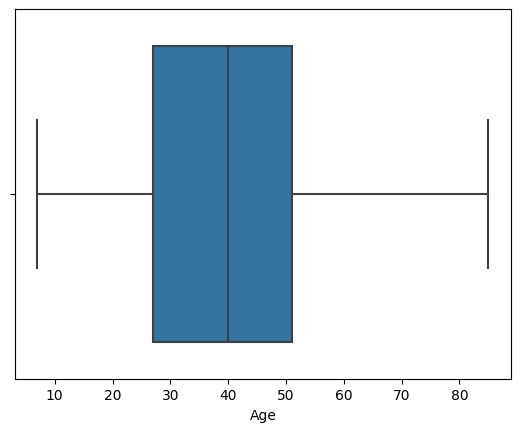

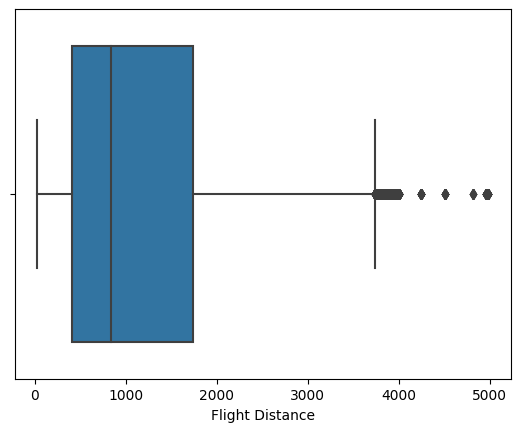

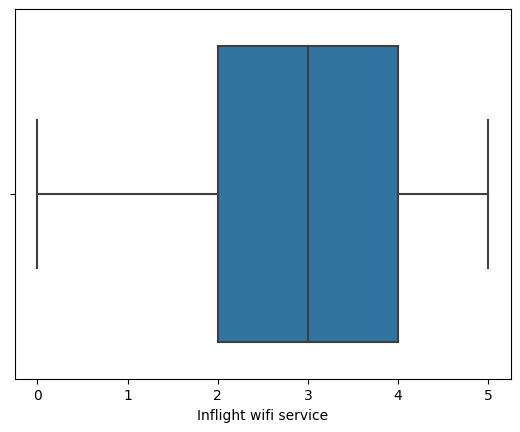

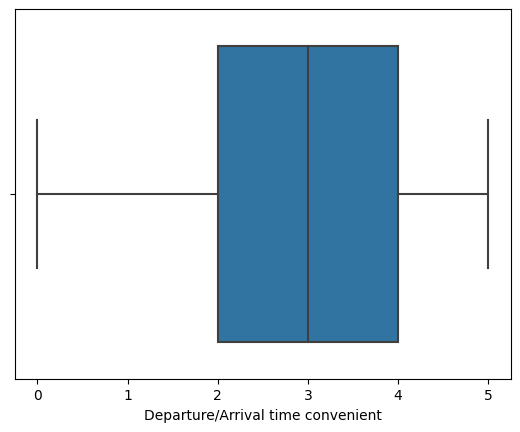

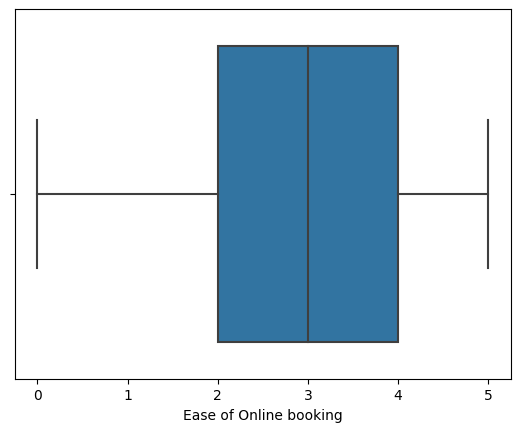

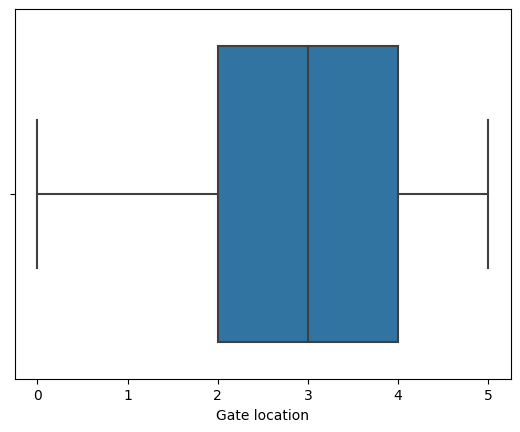

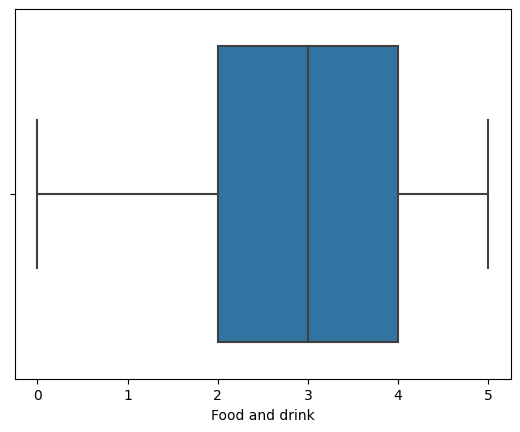

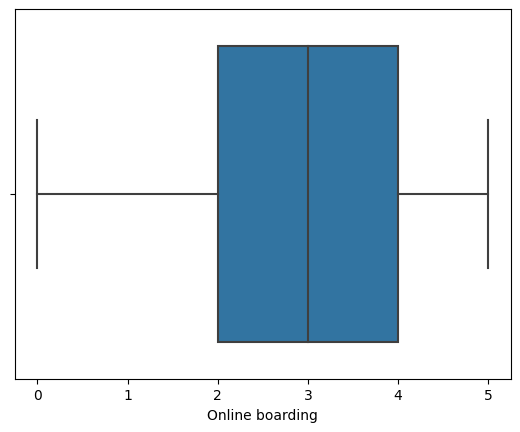

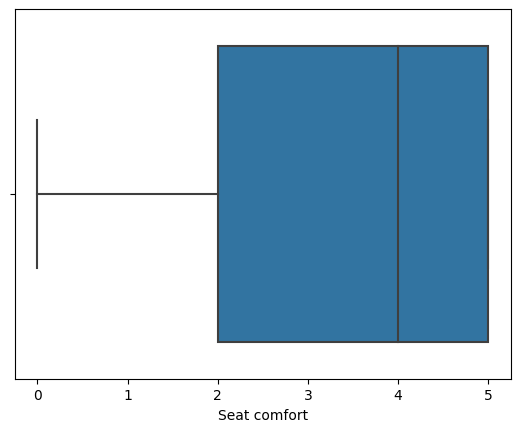

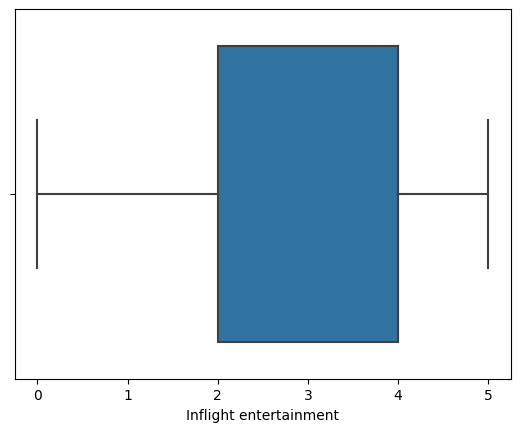

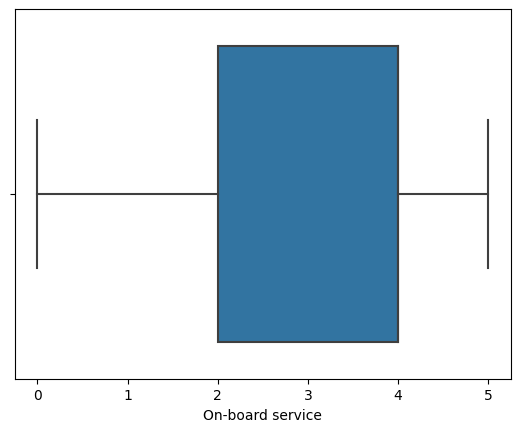

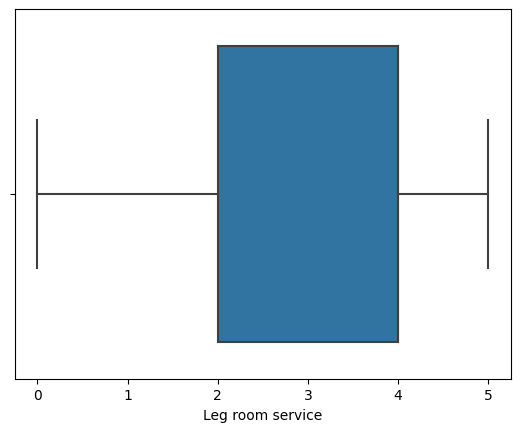

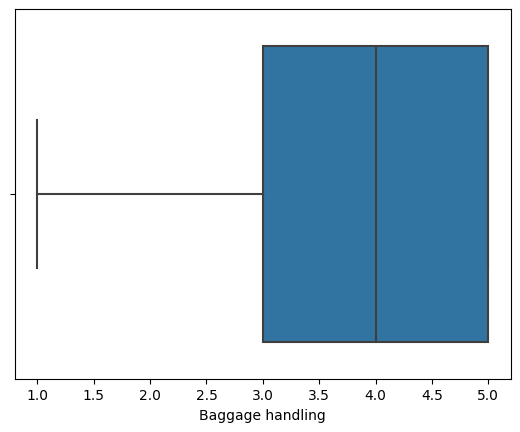

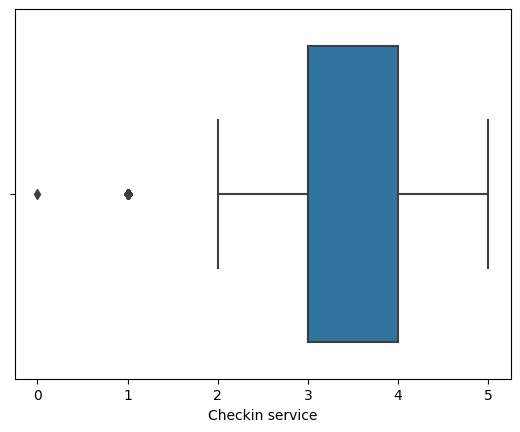

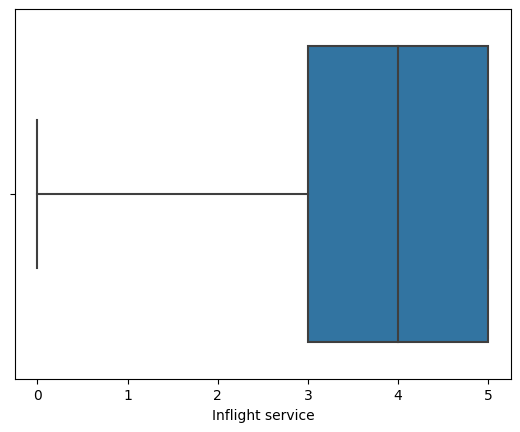

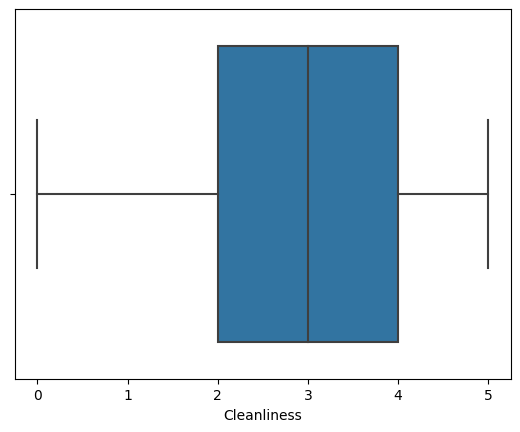

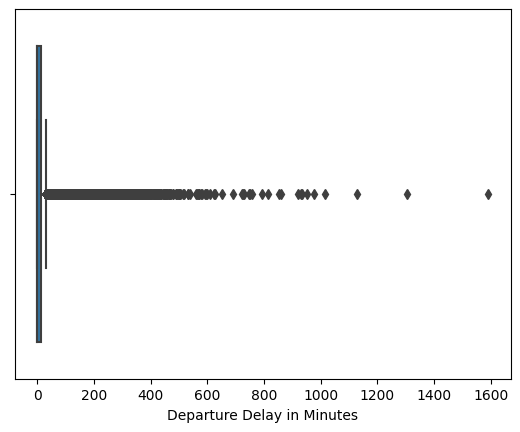

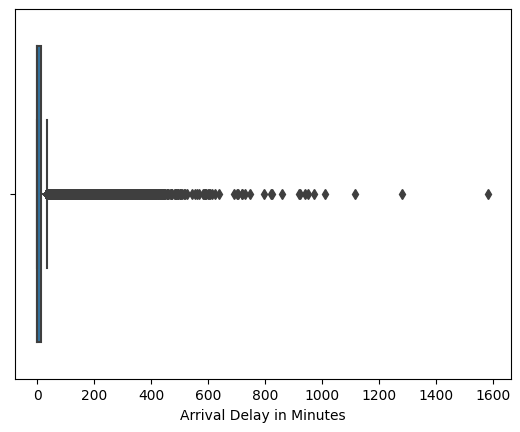

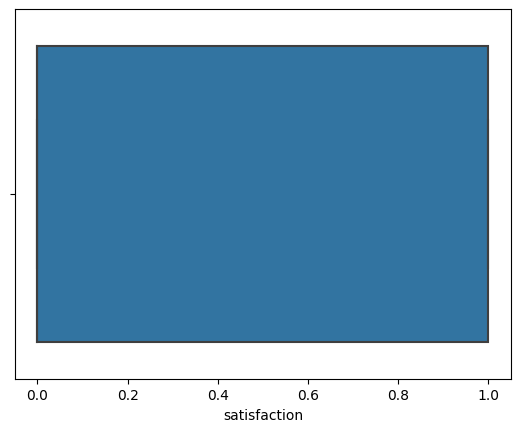

In [46]:
for i in df.columns:
  if df[i].dtypes != 'object':
    sns.boxplot(x=i, data=df)
    plt.show()

dapat dilihat terdapat beberapa kolom pada dataset yang memiliki outliers

# Multivariate Analysis

dilakukan visualisasi untuk melihat korelasi antara kolom numerik pada dataset

<ipython-input-47-89c50c6ff434>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f")


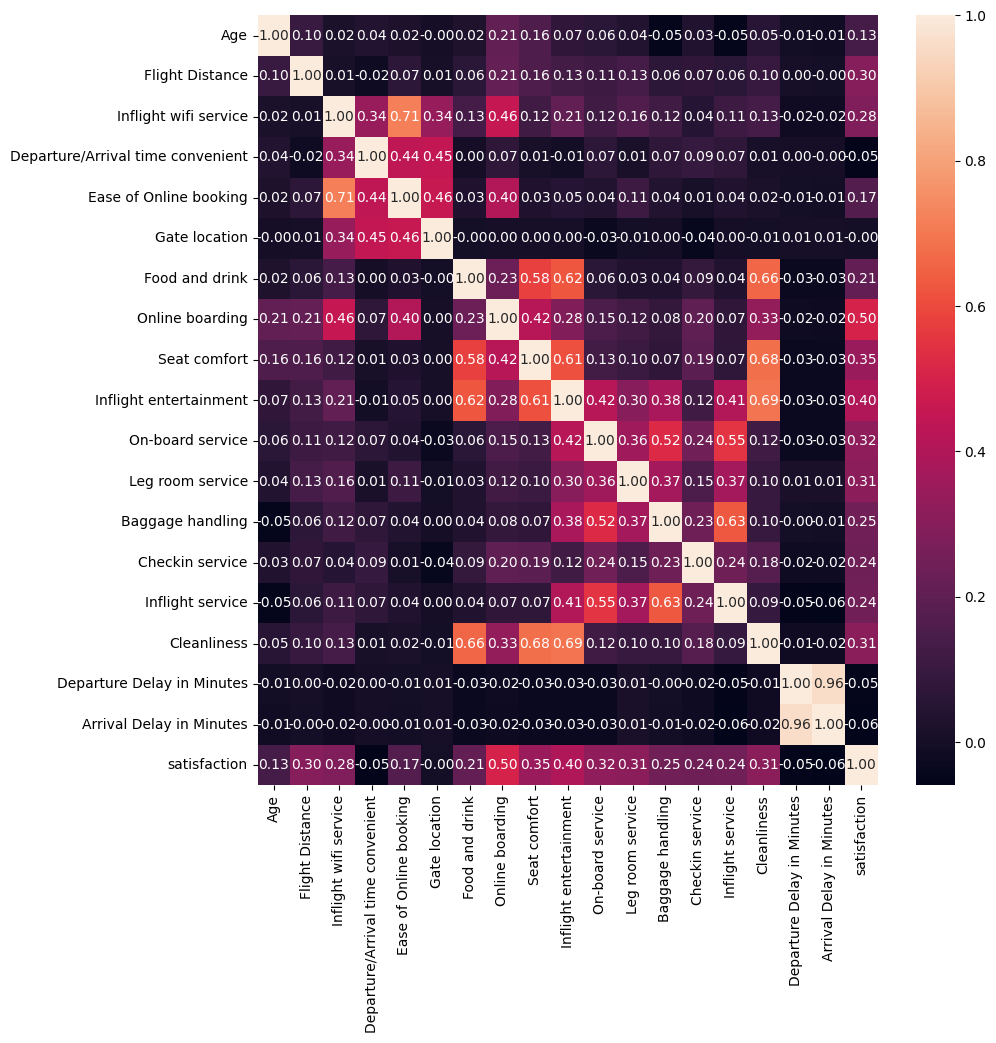

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [48]:
corr = df.corr()['satisfaction'].abs().sort_values(ascending=False)
corr

<ipython-input-48-7d7eb30944cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['satisfaction'].abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Age                                  0.134091
Arrival Delay in Minutes             0.058187
Departure/Arrival time convenient    0.054270
Departure Delay in Minutes           0.050740
Gate location                        0.002793
Name: satisfaction, dtype: float64

dapat kita lihat korelasi antara fitur kolom numerik dengan satisfaction, terdapat banyak kolom yang berkorelasi kuat dengan kolom variabel target

# Data preparation

pada tahap ini kolom dengan data categorical akan diubah menjadi numerical dengan cara encode

In [49]:
df_encoded = pd.get_dummies(df, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [50]:
df_encoded

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0,0,1,0,1,1,0,1,0,0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0,1,1,0,1,0,1,0,0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,1,0,1,0,0,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0,1,1,0,1,0,1,0,0


### Outliers

melakukan standarisasi dataset dari data outliers menggunakan RobustScaler dan MinMaxScaler

In [51]:
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(robust_scaler.fit_transform(df_encoded),columns = df_encoded.columns)
df_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_encoded),columns = df_encoded.columns)
df_scaled.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.415743,0.234111,0.545739,0.611520,0.551375,0.595385,0.640955,0.650527,0.688272,0.671615,0.676605,0.670176,0.658029,0.661253,0.728439,0.657265,0.009242,0.009527,0.434463,0.507384,0.492616,0.816908,0.183092,0.690584,0.309416,0.478596,0.448945,0.072459
std,0.193838,0.201424,0.265868,0.305348,0.280348,0.255704,0.265987,0.270144,0.263858,0.266810,0.257420,0.263250,0.295006,0.253237,0.235334,0.262736,0.023914,0.024247,0.495688,0.499947,0.499947,0.386743,0.386743,0.462255,0.462255,0.499544,0.497388,0.259248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423077,0.164176,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564103,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Splitting

data akan dibagi kedalam 2 variabel yaitu variabel fitur dan target

In [52]:
X = df_scaled.drop('satisfaction', axis=1)
y = df_scaled['satisfaction']

Kemudian dataset dibagi lagi kedalam 2 variable yaitu train set dan test test dimana presentase dari kedua set tersebut adalah 90:10

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, train_size=.90)

# Model Development

### SVC

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear','poly', 'rbf'],
              'C': [8, 9]}

svm = SVC()

svm_GSCV = GridSearchCV(svm, param_grid, cv=2,
                       scoring='accuracy', verbose=0)

svm_GSCV.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [8, 9], 'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [72]:
print("SVM GridSearch CV Result" )
print("\nEstimator terbaik:\n",svm_GSCV.best_estimator_)
print("\nSkor terbaik:\n",svm_GSCV.best_score_)
print("\nParameter terbaik:\n",svm_GSCV.best_params_)

SVM GridSearch CV Result

Estimator terbaik:
 SVC(C=9)

Skor terbaik:
 0.9538805050816138

Parameter terbaik:
 {'C': 9, 'kernel': 'rbf'}


Melakukan testing menggunakan dataset testing set untuk model SVM dan menampilkan score pada metric precision, recall, dan f1-score

In [73]:
print(classification_report(y_test, svm_GSCV.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      7403
         1.0       0.96      0.94      0.95      5585

    accuracy                           0.96     12988
   macro avg       0.96      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



### Decision Tree Classifier

In [79]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]}

clf = tree.DecisionTreeClassifier()

clf_GSCV = GridSearchCV(clf, param_grid, cv=2,
                     scoring='accuracy', verbose=0)

clf_GSCV.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29, 30, 31, 32, 33, 34,
                                       35]},
             scoring='accuracy')

In [80]:
print("Decision Tree GridSearchCV Result " )
print("\nEstimator terbaik:\n",clf_GSCV.best_estimator_)
print("\nSkor terbaik:\n",clf_GSCV.best_score_)
print("\nParameter terbaik:\n",clf_GSCV.best_params_)

Decision Tree GridSearchCV Result 

Estimator terbaik:
 DecisionTreeClassifier(criterion='entropy', max_depth=16)

Skor terbaik:
 0.9502361153885638

Parameter terbaik:
 {'criterion': 'entropy', 'max_depth': 16}


Melakukan testing menggunakan dataset testing set untuk model Decision Tree Classifier dan menampilkan score pada metric precision, recall, dan f1-score

In [81]:
print(classification_report(y_test, clf_GSCV.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      7403
         1.0       0.96      0.94      0.95      5585

    accuracy                           0.96     12988
   macro avg       0.96      0.95      0.96     12988
weighted avg       0.96      0.96      0.96     12988



menampilkan fitur yang paling penting pada klasifikasi menggunakan model decision tree

In [82]:
clf_df_feature_importance = pd.DataFrame(clf_GSCV.best_estimator_.feature_importances_, index=X_test.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
clf_df_feature_importance

,feature importance
Online boarding,0.330447
Inflight wifi service,0.206001
Type of Travel_Business travel,0.139943
Inflight entertainment,0.052022
Class_Business,0.049033
Customer Type_disloyal Customer,0.033708
Checkin service,0.027925
Gate location,0.025582
Baggage handling,0.019215
Inflight service,0.018461


In [ ]:
from lazypredict.Supervised import LazyClassifier
lazy_clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)